### Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Следует обратить внимание, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Этап 1. Загрузка и первичный анализ данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# загружаем данные
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
# просматриваем таблицы
datasets = [users, calls, messages, internet]
for dataset in datasets:
    display(dataset, dataset.info(), dataset.describe()) 
display(tariffs, tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

Мы загрузили 5 датасетов - users, calls, messages, internet, tariffs, содержащих информацию о пользователях, звноках, сообщениях, интернет-сессиях и тарифах соответственно. Рассмотрим эти данные поподробнее, по каждой таблице:
- Users. Таблица 500 х 8, содержащая id пользователя, его ФИО, город, название тарифа, дату его подключения/отключения. Пропуски в таблице только в столбце churn_date, и все они - отражают то, что тариф еще действует. Пока что их заполнение нецелесообразно. Выбросов в данных не обнаружено. Имеет смысл поменять тип в данных с датами c object на datetime.
- Calls. Таблица 202607 х 4. содержит id звонка, дату, длительность, id звонившего. Пропусков в таблице нет, но есть нулевые значения длительности. Возможно, пропущенные вызовы. Типы данных - соответствуют все кроме даты.
- Messages. Таблица 123036 х 3, содержит id и дату сообщения, id отправителя. Пропусков нет, тип данных с датой надо заменить на соответствующий.
- Internet. Таблица 149396 х 5, с id пользователя и сессии, датой сессии и объемом потраченного траффика. Пропусков нет, но есть нулевые значения потраченного траффика. Эти значения не являются артефактами данных, и убирать их не нужно. Из типов данных - требуется уже привычная замена даты с object на datetime. Есть столбец 'unnamed', в котором содержатся значения индексов таблицы. Его можно удалить
- Tariffs. Таблица 2 х 8. Содержит параметры для двух наших тарифов. В ней все четко, менять ничего не требуется.

В целом - набор данных очень качественный, без пропусков. Нулевые значения объясняются объективными причинами, а не ошибками сбора или обработки данных. Необходимо только заменить типы данных в нескольких столбцах.

### Этап 2. Подготовка данных

In [3]:
# приведение данных к нужным типам
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S')
# проверка
for dataset in datasets:
    display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


None

Все данные в столбцах с датами были приведены к типу datetime64.

In [4]:
# создаем столбцы с месяцами
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
# проверяем результат
for dataset in datasets:
    display(dataset.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Для последующей группировки по месяцам создаем столбцы 'month' в таблицах со звонками, соообщениями и траффиком.

In [5]:
# просматриваем столбцы с минутами и мегабайтами
display(calls['duration'], internet['mb_used'])

# меняем тип на целочисленный
calls['duration'] = calls['duration'].apply(math.ceil).astype(int)
internet['mb_used'] = internet['mb_used'].apply(math.ceil).astype(int)
calls['duration'] = calls['duration'].astype('int16')
internet['mb_used'] = internet['mb_used'].astype('int16')
# проверяем результат
display(calls['duration'], internet['mb_used'])

0          0.00
1          0.00
2          2.85
3         13.80
4          5.18
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 202607, dtype: float64

0          112.95
1         1052.81
2         1197.26
3          550.27
4          302.56
           ...   
149391     318.90
149392     490.13
149393       0.00
149394    1246.32
149395     544.37
Name: mb_used, Length: 149396, dtype: float64

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int16

0          113
1         1053
2         1198
3          551
4          303
          ... 
149391     319
149392     491
149393       0
149394    1247
149395     545
Name: mb_used, Length: 149396, dtype: int16

столбцы с минутами и мегабайтами были успешно округлены в большую сторону

In [6]:
# строим сводную таблицу по звонкам
calls_grouped = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_grouped.columns = ['calls_count', 'duration_sum']
display(calls_grouped.head(30))
# строим сводную таблицу по сообщениям
messages_grouped = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count'])
messages_grouped.columns = ['messages_count']
display(messages_grouped.head(30))
# строим сводную таблицу по траффику
internet_grouped = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
internet_grouped.columns = ['traffic_sum']
display(internet_grouped.head(30))
# объединяем сводные таблицы в одну
joint_data = calls_grouped.join([messages_grouped, internet_grouped], how='outer')
# просматриваем результат
display(joint_data)

calls_count  duration_sum
user_id month                           
1000    5               22           159
        6               43           172
        7               47           340
        8               52           408
        9               58           466
        10              57           350
        11              43           338
        12              46           333
1001    11              59           430
        12              63           414
1002    6               15           117
        7               26           214
        8               42           289
        9               36           206
        10              33           212
        11              32           243
        12              33           236
1003    8               55           380
        9              134           961
        10             108           855
        11             115           824
        12             108           802
1004    5                9            35
        6               31           171
        7               22           135
        8               19           137
        9               26           117
        10              29           145
        11              19           117
        12              21           130

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11
        8                  13
        9                   4
        10                 10
        11                 16
        12                 12
1003    8                  37
        9                  91
        10                 83
        11                 94
        12                 75
1004    5                  95
        6                 134
        7                 181
        8                 151
        9                 146
        10                165
        11                158
        12                162
1005    1                   7
        2                  38

traffic_sum
user_id month             
1000    5           2256.0
        6          23257.0
        7          14016.0
        8          14070.0
        9          14581.0
        10         14717.0
        11         14768.0
        12          9827.0
1001    11         18452.0
        12         14053.0
1002    6          10871.0
        7          17601.0
        8          20347.0
        9          16712.0
        10         13905.0
        11         18610.0
        12         18137.0
1003    8           8571.0
        9          12479.0
        10         14779.0
        11         11368.0
        12         10132.0
1004    5          13415.0
        6          17619.0
        7          22243.0
        8          28607.0
        9          15125.0
        10         18494.0
        11         15631.0
        12         18038.0

calls_count  duration_sum  messages_count  traffic_sum
user_id month                                                        
1000    5             22.0         159.0            22.0       2256.0
        6             43.0         172.0            60.0      23257.0
        7             47.0         340.0            75.0      14016.0
        8             52.0         408.0            81.0      14070.0
        9             58.0         466.0            57.0      14581.0
...                    ...           ...             ...          ...
1498    10            41.0         247.0            42.0      20604.0
1499    9              9.0          70.0            11.0       1848.0
        10            68.0         449.0            48.0      17809.0
        11            74.0         612.0            59.0      17984.0
        12            69.0         492.0            66.0      13077.0

[3214 rows x 4 columns]

Путем группировки данных по пользователям и месяцам мы получили таблицу joint_data, где для каждого пользователя отображаются количество звонков, суммарная их длительность, количество отправленных сообщений и суммарный траффик

In [7]:
# просматриваем количество пропусков в сводной таблице
print(joint_data.isna().sum())

calls_count        40
duration_sum       40
messages_count    497
traffic_sum        11
dtype: int64


In [8]:
# заполняем пропуска нулями
joint_data = joint_data.fillna(0)
# проверяем
print(joint_data.isna().sum())

calls_count       0
duration_sum      0
messages_count    0
traffic_sum       0
dtype: int64


В сводной таблице у нас получились Nan'ы - получились из-за того, что многие пользователи не отправляли сообщений, а некоторые не пользовались интернетом. Все пропуски я заменил нулями, это пригодится при дальнейшем анализе.

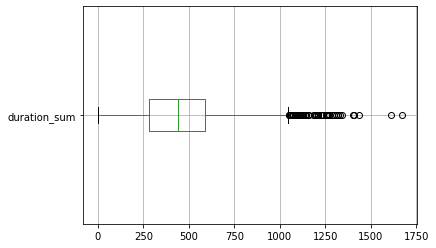

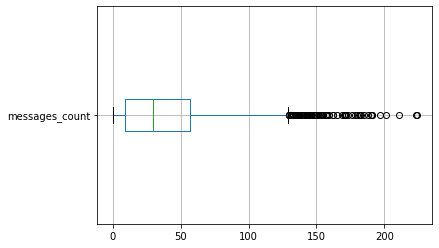

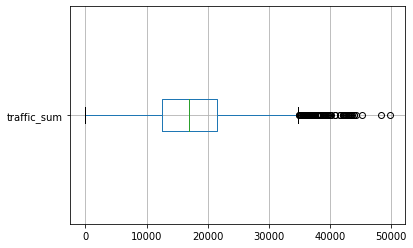

In [9]:
# строим 'ящики с усами' для необходимых величин
for param in ['duration_sum', 'messages_count', 'traffic_sum']:
    joint_data.boxplot(column=param, vert=False)
    plt.show() 

При просмотре параметров методом boxplot() мы выявили выбросы, от которых нужно избавиться.

{'duration_sum': 1049.5, 'messages_count': 129.0, 'traffic_sum': 34867.125}

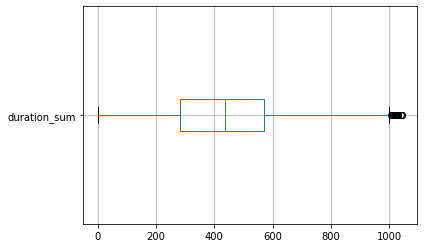

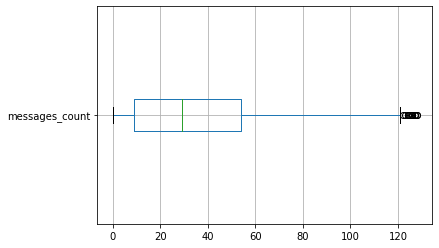

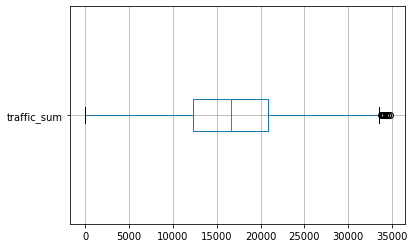

При фильтрации мы отбросили 206 строк


In [10]:
# получаем границы для выбросов
d_upper = {}
for param in ['duration_sum', 'messages_count', 'traffic_sum']:
    Q1 = joint_data[param].quantile(q=0.25)
    Q3 = joint_data[param].quantile(q=0.75)
    IQR = Q3 - Q1 
    upper_line = Q3 + 1.5 * IQR
    d_upper[param] = upper_line
# просматриваем значения
display(d_upper)

duration_upper = d_upper['duration_sum']
messages_upper = d_upper['messages_count']
traffic_upper = d_upper['traffic_sum']
# отсекаем выбросы, пишем отфильтрованные данные в новую таблицу
joint_data_filt = (
    joint_data
    .query('duration_sum < @duration_upper')
    .query('messages_count < @messages_upper')
    .query('traffic_sum < @traffic_upper')
)
# проверяем результат
for param in ['duration_sum', 'messages_count', 'traffic_sum']:
    joint_data_filt.boxplot(column=param, vert=False)
    plt.show()
    
print('При фильтрации мы отбросили', len(joint_data) - len(joint_data_filt), 'строк')

Выбросы отсечены, статистика будет точнее

Разделив таблицу на две отдельные для каждого тарифа, мы посчитали выручку по пользователям. Что сразу бросается в глаза - выручка по пользователям Ultra часто равна самому тарифу, ибо в него включено опций "с запасом". У пользователей Smart другая интересная тенденция - переплата сверх тарифа идет либо по звонкам, либо по траффику - но никак по обоим вместе. Скорее всего это потому, что люди общительны примерно одинаково, но многие сейчас пользуются для аудио- и видеозвонков интернет-мессенджерами. Отсюда и больший расход траффика при малом количестве звонков.

In [12]:
# создаем списки пользователей для каждого тарифа
smart = users.query('tariff == "smart"')['user_id']
ultra = users.query('tariff == "ultra"')['user_id']
# вспоминаем условия тарифа
display(tariffs)
# делим общую таблицу на две, для каждого тарифа
smart_data = joint_data_filt.query('user_id in @smart')
ultra_data = joint_data_filt.query('user_id in @ultra')
# создаем вспомогательные столбцы для расчета выручки, и столбец с самой выручкой для тарифа Smart
smart_data['minutes_rev'] = (smart_data['duration_sum'] - tariffs['minutes_included'][0]) * tariffs['rub_per_minute'][0]
smart_data.loc[smart_data['minutes_rev'] < 0, 'minutes_rev'] = 0
smart_data['messages_rev'] = (smart_data['messages_count'] - tariffs['messages_included'][0]) * tariffs['rub_per_message'][0]
smart_data.loc[smart_data['messages_rev'] < 0, 'messages_rev'] = 0
# для траффика округляем данные до гигабайт, в большую сторону
smart_data['traffic_sum'] = smart_data['traffic_sum'] / 1024
smart_data['traffic_sum'] = smart_data['traffic_sum'].apply(rounder)
# продолжаем вычисление выручки
smart_data['traffic_rev'] = (smart_data['traffic_sum'] - (tariffs['mb_per_month_included'][0] / 1024)) * tariffs['rub_per_gb'][0]
smart_data.loc[smart_data['traffic_rev'] < 0, 'traffic_rev'] = 0
smart_data['revenue'] = smart_data['minutes_rev'] + smart_data['messages_rev'] + smart_data['traffic_rev'] + tariffs['rub_monthly_fee'][0]
# то же самое, для тарифа Ultra
ultra_data['minutes_rev'] = (ultra_data['duration_sum'] - tariffs['minutes_included'][1]) * tariffs['rub_per_minute'][1]
ultra_data.loc[ultra_data['minutes_rev'] < 0, 'minutes_rev'] = 0
ultra_data['messages_rev'] = (ultra_data['messages_count'] - tariffs['messages_included'][1]) * tariffs['rub_per_message'][1]
ultra_data.loc[ultra_data['messages_rev'] < 0, 'messages_rev'] = 0

ultra_data['traffic_sum'] = ultra_data['traffic_sum'] / 1024
ultra_data['traffic_sum'] = ultra_data['traffic_sum'].apply(rounder)

ultra_data['traffic_rev'] = (ultra_data['traffic_sum'] - (tariffs['mb_per_month_included'][1] / 1024)) * tariffs['rub_per_gb'][1]
ultra_data.loc[ultra_data['traffic_rev'] < 0, 'traffic_rev'] = 0
ultra_data['revenue'] = ultra_data['minutes_rev'] + ultra_data['messages_rev'] + ultra_data['traffic_rev'] + tariffs['rub_monthly_fee'][1]
# просматриваем результат
display(smart_data.head(30))
display(ultra_data.head(30))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

calls_count  duration_sum  messages_count  traffic_sum  \
user_id month                                                           
1001    11            59.0         430.0             0.0           19   
        12            63.0         414.0             0.0           14   
1002    6             15.0         117.0             4.0           11   
        7             26.0         214.0            11.0           18   
        8             42.0         289.0            13.0           20   
        9             36.0         206.0             4.0           17   
        10            33.0         212.0            10.0           14   
        11            32.0         243.0            16.0           19   
        12            33.0         236.0            12.0           18   
1005    1             15.0          95.0             7.0            3   
        2             69.0         456.0            38.0            8   
        3             77.0         606.0            56.0           11   
        4            101.0         712.0            41.0           10   
        5             73.0         595.0            42.0            8   
        6             80.0         612.0            47.0           10   
        7             77.0         569.0            56.0            8   
        8             71.0         619.0            64.0            8   
        9             66.0         479.0            52.0            7   
        10           100.0         723.0            44.0            8   
        11            75.0         547.0            51.0           13   
        12            84.0         592.0            54.0            9   
1006    2              3.0          42.0             0.0            2   
        3             46.0         286.0             0.0           17   
        4             47.0         356.0             0.0           14   
        5             56.0         370.0             0.0           13   
        6             53.0         478.0             0.0           13   
        7             49.0         316.0             0.0           20   
        8             42.0         275.0             0.0           19   
        9             54.0         360.0             0.0           16   
        10            44.0         267.0             0.0           20   

               minutes_rev  messages_rev  traffic_rev  revenue  
user_id month                                                   
1001    11             0.0           0.0        800.0   1350.0  
        12             0.0           0.0          0.0    550.0  
1002    6              0.0           0.0          0.0    550.0  
        7              0.0           0.0        600.0   1150.0  
        8              0.0           0.0       1000.0   1550.0  
        9              0.0           0.0        400.0    950.0  
        10             0.0           0.0          0.0    550.0  
        11             0.0           0.0        800.0   1350.0  
        12             0.0           0.0        600.0   1150.0  
1005    1              0.0           0.0          0.0    550.0  
        2              0.0           0.0          0.0    550.0  
        3            318.0          18.0          0.0    886.0  
        4            636.0           0.0          0.0   1186.0  
        5            285.0           0.0          0.0    835.0  
        6            336.0           0.0          0.0    886.0  
        7            207.0          18.0          0.0    775.0  
        8            357.0          42.0          0.0    949.0  
        9              0.0           6.0          0.0    556.0  
        10           669.0           0.0          0.0   1219.0  
        11           141.0           3.0          0.0    694.0  
        12           276.0          12.0          0.0    838.0  
1006    2              0.0           0.0          0.0    550.0  
        3              0.0           0.0        400.0    950.0  
        4              0.0           0.0          0.0

calls_count  duration_sum  messages_count  traffic_sum  \
user_id month                                                           
1000    5             22.0         159.0            22.0            3   
        6             43.0         172.0            60.0           23   
        7             47.0         340.0            75.0           14   
        8             52.0         408.0            81.0           14   
        9             58.0         466.0            57.0           15   
        10            57.0         350.0            73.0           15   
        11            43.0         338.0            58.0           15   
        12            46.0         333.0            70.0           10   
1003    8             55.0         380.0            37.0            9   
        9            134.0         961.0            91.0           13   
        10           108.0         855.0            83.0           15   
        11           115.0         824.0            94.0           12   
        12           108.0         802.0            75.0           10   
1004    5              9.0          35.0            95.0           14   
1013    11            52.0         369.0            17.0           10   
        12            90.0         567.0            25.0           21   
1016    11             4.0          28.0            39.0            8   
        12            16.0          94.0           103.0           19   
1018    4             85.0         636.0            34.0            6   
        5             80.0         507.0            30.0            5   
        6             96.0         679.0            24.0           12   
        7            105.0         760.0            25.0            7   
        8            115.0         929.0            20.0            9   
        9             81.0         520.0            21.0            8   
        10            78.0         503.0            26.0            8   
        11            96.0         685.0            17.0            5   
        12           110.0         839.0            37.0            6   
1019    5             37.0         300.0            21.0           11   
        6             52.0         386.0            25.0           22   
        7             60.0         453.0            16.0           18   

               minutes_rev  messages_rev  traffic_rev  revenue  
user_id month                                                   
1000    5              0.0           0.0          0.0   1950.0  
        6              0.0           0.0          0.0   1950.0  
        7              0.0           0.0          0.0   1950.0  
        8              0.0           0.0          0.0   1950.0  
        9              0.0           0.0          0.0   1950.0  
        10             0.0           0.0          0.0   1950.0  
        11             0.0           0.0          0.0   1950.0  
        12             0.0           0.0          0.0   1950.0  
1003    8              0.0           0.0          0.0   1950.0  
        9              0.0           0.0          0.0   1950.0  
        10             0.0           0.0          0.0   1950.0  
        11             0.0           0.0          0.0   1950.0  
        12             0.0           0.0          0.0   1950.0  
1004    5              0.0           0.0          0.0   1950.0  
1013    11             0.0           0.0          0.0   1950.0  
        12             0.0           0.0          0.0   1950.0  
1016    11             0.0           0.0          0.0   1950.0  
        12             0.0           0.0          0.0   1950.0  
1018    4              0.0           0.0          0.0   1950.0  
        5              0.0           0.0          0.0   1950.0  
        6              0.0           0.0          0.0   1950.0  
        7              0.0           0.0          0.0   1950.0  
        8              0.0           0.0          0.0   1950.0  
        9              0.0           0.0          0.0

Константы заменены на прямые данные из таблиц.

Округлились значения траффика до гигабайт - округлились и суммы выручки от клиентов. Данные округлились - изменились гистограммы траффика и выручки снизу, стали более "разорванными". Снизил bins до 35 - все данные остались вполне наглядны

### Этап 3. Анализ данных

duration_sum smart, распределение


month
1       6931.0
2      17324.0
3      30034.0
4      41119.0
5      54618.0
6      64128.0
7      81360.0
8      98263.0
9     110724.0
10    124446.0
11    136780.0
12    152355.0
Name: duration_sum, dtype: float64

duration_sum ultra, распределение


month
1      3853.0
2      7131.0
3     13149.0
4     22821.0
5     29244.0
6     33770.0
7     34729.0
8     41478.0
9     45351.0
10    48293.0
11    51037.0
12    53861.0
Name: duration_sum, dtype: float64

тариф Smart, среднее duration_sum :        415.04611211573234
тариф Ultra, среднее duration_sum :        483.31281407035175

тариф Smart, дисперсия duration_sum :      34946.91329559665
тариф Ultra, дисперсия duration_sum :      71093.63158402072

тариф Smart, ст. отклонение duration_sum : 186.94093531272557
тариф Ultra, ст. отклонение duration_sum : 266.6338905391074


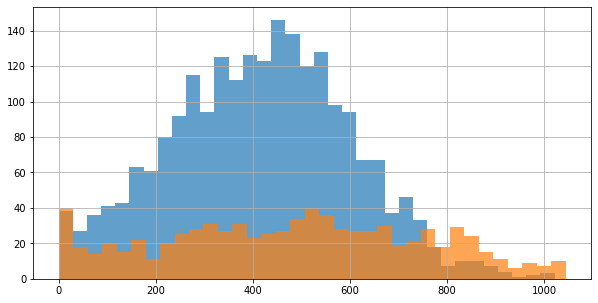

Общая выручка тарифа Smart: 2812783.0
Общая выручка тарифа Ultra: 1571100.0
messages_count smart, распределение


month
1       620.0
2      1397.0
3      2453.0
4      3443.0
5      4762.0
6      5344.0
7      6647.0
8      7771.0
9      8610.0
10     9788.0
11    10672.0
12    11480.0
Name: messages_count, dtype: float64

messages_count ultra, распределение


month
1      304.0
2      527.0
3      741.0
4     1446.0
5     2030.0
6     2534.0
7     2617.0
8     3512.0
9     3732.0
10    4345.0
11    4594.0
12    4791.0
Name: messages_count, dtype: float64

тариф Smart, среднее messages_count :        32.99593128390597
тариф Ultra, среднее messages_count :        39.16206030150754

тариф Smart, дисперсия messages_count :      763.4595040169856
тариф Ultra, дисперсия messages_count :      1257.5648983913277

тариф Smart, ст. отклонение messages_count : 27.630770963130683
тариф Ultra, ст. отклонение messages_count : 35.462161501963294


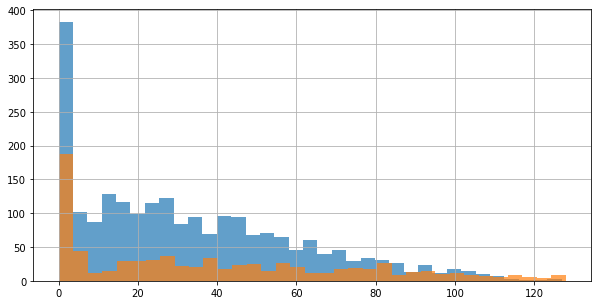

Общая выручка тарифа Smart: 2812783.0
Общая выручка тарифа Ultra: 1571100.0
traffic_sum smart, распределение


month
1      297
2      687
3     1174
4     1528
5     2248
6     2595
7     3178
8     3920
9     4246
10    4945
11    5345
12    5816
Name: traffic_sum, dtype: int64

traffic_sum ultra, распределение


month
1      120
2      288
3      520
4      822
5     1066
6     1296
7     1151
8     1529
9     1696
10    1748
11    1801
12    1927
Name: traffic_sum, dtype: int64

тариф Smart, среднее traffic_sum :        16.265370705244123
тариф Ultra, среднее traffic_sum :        17.542713567839197

тариф Smart, дисперсия traffic_sum :      31.883865850756088
тариф Ultra, дисперсия traffic_sum :      72.37175816187857

тариф Smart, ст. отклонение traffic_sum : 5.646580013668104
тариф Ultra, ст. отклонение traffic_sum : 8.507159229841568


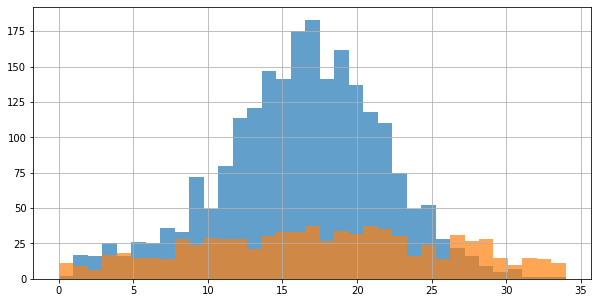

Общая выручка тарифа Smart: 2812783.0
Общая выручка тарифа Ultra: 1571100.0
revenue smart, распределение


month
1      24525.0
2      48001.0
3      89676.0
4     107866.0
5     169849.0
6     194486.0
7     244546.0
8     308892.0
9     323133.0
10    398436.0
11    420123.0
12    483250.0
Name: revenue, dtype: float64

revenue ultra, распределение


month
1      17550.0
2      47400.0
3      61350.0
4      98400.0
5     115950.0
6     143550.0
7     132000.0
8     175200.0
9     184800.0
10    191850.0
11    204300.0
12    198750.0
Name: revenue, dtype: float64

тариф Smart, среднее revenue :        1271.6017179023509
тариф Ultra, среднее revenue :        1973.7437185929648

тариф Smart, дисперсия revenue :      595880.4559536282
тариф Ultra, дисперсия revenue :      9963.828576846496

тариф Smart, ст. отклонение revenue : 771.9329348807629
тариф Ultra, ст. отклонение revenue : 99.81897904129502


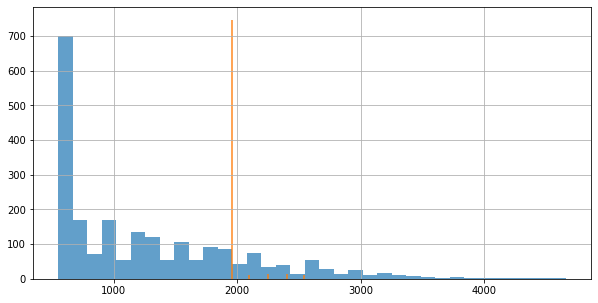

Общая выручка тарифа Smart: 2812783.0
Общая выручка тарифа Ultra: 1571100.0


In [13]:
# создаем вспомогательный список
hist_columns = ['duration_sum', 'messages_count', 'traffic_sum', 'revenue']
for column in hist_columns:
    # выводим распределение по месяцам 
    print(column, 'smart, распределение')
    display(smart_data.groupby('month')[column].sum())
    print(column, 'ultra, распределение')
    display(ultra_data.groupby('month')[column].sum())
    # вычисляем средние, дисперсии, ст. отклонения для необходимых величин
    print('тариф Smart, среднее', column, ':       ', smart_data[column].mean())
    print('тариф Ultra, среднее', column, ':       ', ultra_data[column].mean())
    print()
    print('тариф Smart, дисперсия', column, ':     ', np.var(smart_data[column], ddof=1))
    print('тариф Ultra, дисперсия', column, ':     ', np.var(ultra_data[column], ddof=1))
    print()
    print('тариф Smart, ст. отклонение', column, ':', np.std(smart_data[column], ddof=1))
    print('тариф Ultra, ст. отклонение', column, ':', np.std(ultra_data[column], ddof=1))
        
    # строим гистограммы по месяцам
    smart_data[column].hist(bins=35, figsize=(10,5), alpha=0.7)
    ultra_data[column].hist(bins=35, figsize=(10,5), alpha=0.7)
    plt.show()
    print('Общая выручка тарифа Smart:', smart_data['revenue'].sum())
    print('Общая выручка тарифа Ultra:', ultra_data['revenue'].sum())

Анализ поведения клиентов.
- Минуты разговора. Разговорные привычки клиентов наших тарифов сильно различаются: среднее время разговора больше у клиентов Ultra примерно на четверть. Распределение весьма рвномерное, без четких максимумов. Это значит, что за счет большого бесплатного лимита люди говорят, кому сколько по душе. Правда проговаривающих больше 850 минут в месяц все же уже не так много. 
График же для клиентов Smart близок к нормальному распределению, но скошен влево. Видно, что люди следят за минутами, и говорящих сверх бесплатного лимита относительно мало.
- Сообщения. Гистограмма по сообщениям ровная, слегка выпуклая, похожа у обоих тарифов и скошена вправо, но есть нюанс - огромный пик на нулевых значениях. То есть, поведение отправителей в принципе одинаковое. Те, кто пишут сообщения - пишут в среднем по 30-40 сообщений в месяц, и число любителей смс далее плавно снижается, больше 3х сообщений в день почти никто не отправляет. Пик на нулевых значениях имеет простое объяснение - в эпоху мессенджеров смс уходят в прошлое, все больше выполняя роль оповещений с пин-кодом.
- Траффик. Распределение по траффику в целом повторяет распределение по минутам, за исключением одного момента - половина пользователей Smart не укладываются в бесплатный лимит и переплачивают. Распределение по тарифу Smart очень близко к нормальному, а это значит лишь одно - без интернета в наше время никак.
- Выручка. Здесь мы подходим к самому интересному. Распределения по обоим тарифам очень неравномерные, с пиками на величинах абонентских плат. И тут можно сделать следующие выводы: пользователи Ultra платят большую абонентскую плату, но практически никогда не платят сверх того. Пользователи Smart тоже чаще всего не выходят из пределов абонентской платы, однако если выходят - приходится платить. И для некоторого числа людей с этим тарифом расходы намного превышают абонентку Ultra. Этим клиентам стоит задуматься)

### Этап 4. Проверка гипотез

Нам необходимо проверить гипотезу о том, что средняя выручка с пользователей тарифов Smart и Ultra различается. Поэтому как нулевую мы принимаем гипотезу о том, что средние выручки равны. Проверяем гипотезу, применяя метод scipy.stats.ttest_rel() - для средних двух генеральных совокупностей для парных выборок. И в результате теста наша гипотеза подтверждается.

In [18]:

# строим среднее для выборки по каждому тарифу
smart_data_mean = smart_data.groupby('month')['revenue'].mean()
ultra_data_mean = ultra_data.groupby('month')['revenue'].mean()

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    smart_data_mean, 
    ultra_data_mean, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Средняя выручка с пользователей тарифов Smart и Ultra различается, отвергаем нулевую гипотезу") # отвергаем нулевую гипотезу
else:
    print("Средняя выручка с пользователей тарифов Smart и Ultra не различается, отвергнуть нулевую гипотезу не получилось") # отвергнуть нулевую гипотезу не получилось
    

'\n# строим среднее для выборки по каждому тарифу\nsmart_data_mean = smart_data.groupby(\'month\')[\'revenue\'].mean()\nultra_data_mean = ultra_data.groupby(\'month\')[\'revenue\'].mean()\n\nalpha = .05 # критический уровень статистической значимости\n\nresults = st.ttest_ind(\n    smart_data_mean, \n    ultra_data_mean, equal_var = False)\n\nprint(\'p-значение: \', results.pvalue)\n\nif (results.pvalue < alpha):\n    print("Средняя выручка с пользователей тарифов Smart и Ultra различается, отвергаем нулевую гипотезу") # отвергаем нулевую гипотезу\nelse:\n    print("Средняя выручка с пользователей тарифов Smart и Ultra не различается, отвергнуть нулевую гипотезу не получилось") # отвергнуть нулевую гипотезу не получилось\n    '

Мы сравниваем средние двух генеральных совокупностей - имея две выборки - по тарифам Смарт и Ультра.

H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Например, если мы исследуем, не увеличилась ли величина, то нулевая гипотеза будет звучать: «нет, не увеличилась».

Нулевую гипотезу мы соответственно формулруем как "средняя выручка пользователей тарифов Смарт и Ультра равна", как альтернативную - средняя выручка различается.

В результатае применения метода st.ttest_ind() получаем p-value, гораздо меньший критического значения. Нулевую гипотезу можно отвергнуть. Так как дисперсии сравниваемых величин разные, параметр equal_val принимался равным False.

In [19]:
# создаем списки пользователей для москвы и регионов
moscow = users.query('city == "Москва"')['user_id']
region = users.query('city != "Москва"')['user_id']
# делаем таблицы для Москвы и регионов, по тарифам
moscow_smart = smart_data.query('user_id in @moscow')
moscow_ultra = ultra_data.query('user_id in @moscow')
region_smart = smart_data.query('user_id in @region')
region_ultra = ultra_data.query('user_id in @region')
# объединяем таблицы с тарифами, оставляем только географическое деление
moscow_data = pd.concat([moscow_smart, moscow_ultra])
region_data = pd.concat([region_smart, region_ultra])
# смотрим результат
display(moscow_data)
display(region_data)

calls_count  duration_sum  messages_count  traffic_sum  \
user_id month                                                           
1001    11            59.0         430.0             0.0           19   
        12            63.0         414.0             0.0           14   
1007    4             25.0         198.0            11.0            8   
        5             67.0         480.0            39.0           18   
        6             68.0         545.0            26.0           14   
...                    ...           ...             ...          ...   
1476    8             59.0         456.0             5.0           25   
        9             72.0         622.0             5.0           19   
        10            68.0         540.0             4.0           25   
        11            71.0         556.0             6.0           15   
        12            81.0         588.0            11.0           14   

               minutes_rev  messages_rev  traffic_rev  revenue  
user_id month                                                   
1001    11             0.0           0.0        800.0   1350.0  
        12             0.0           0.0          0.0    550.0  
1007    4              0.0           0.0          0.0    550.0  
        5              0.0           0.0        600.0   1150.0  
        6            135.0           0.0          0.0    685.0  
...                    ...           ...          ...      ...  
1476    8              0.0           0.0          0.0   1950.0  
        9              0.0           0.0          0.0   1950.0  
        10             0.0           0.0          0.0   1950.0  
        11             0.0           0.0          0.0   1950.0  
        12             0.0           0.0          0.0   1950.0  

[572 rows x 8 columns]

calls_count  duration_sum  messages_count  traffic_sum  \
user_id month                                                           
1002    6             15.0         117.0             4.0           11   
        7             26.0         214.0            11.0           18   
        8             42.0         289.0            13.0           20   
        9             36.0         206.0             4.0           17   
        10            33.0         212.0            10.0           14   
...                    ...           ...             ...          ...   
1493    11            26.0         173.0            16.0           12   
1495    8             17.0          92.0            13.0            3   
        9            112.0         813.0            82.0           33   
        10           152.0        1030.0            82.0           29   
        12           155.0        1031.0            84.0           23   

               minutes_rev  messages_rev  traffic_rev  revenue  
user_id month                                                   
1002    6              0.0           0.0          0.0    550.0  
        7              0.0           0.0        600.0   1150.0  
        8              0.0           0.0       1000.0   1550.0  
        9              0.0           0.0        400.0    950.0  
        10             0.0           0.0          0.0    550.0  
...                    ...           ...          ...      ...  
1493    11             0.0           0.0          0.0   1950.0  
1495    8              0.0           0.0          0.0   1950.0  
        9              0.0           0.0        450.0   2400.0  
        10             0.0           0.0          0.0   1950.0  
        12             0.0           0.0          0.0   1950.0  

[2436 rows x 8 columns]

In [22]:

# сравниваем дисперсии для москвы и регионов
print('Москва, дисперсия выручки :     ', np.var(moscow_data['revenue'], ddof=1))
print('регионы, дисперсия выручки :     ', np.var(region_data['revenue'], ddof=1))
# строим среднее для выборки по географиеским параметрам
moscow_data_mean = moscow_data.groupby('month')['revenue'].mean()
region_data_mean = region_data.groupby('month')['revenue'].mean()

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    moscow_data_mean, 
    region_data_mean, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Средняя выручка с пользователей Москвы и регионов различается, отвергаем нулевую гипотезу") # отвергаем нулевую гипотезу
else:
    print("Средняя выручка с пользователей Москвы и регионов не различается, отвергнуть нулевую гипотезу не получилось") # отвергнуть нулевую гипотезу не получилось
    

'\n# сравниваем дисперсии для москвы и регионов\nprint(\'Москва, дисперсия выручки :     \', np.var(moscow_data[\'revenue\'], ddof=1))\nprint(\'регионы, дисперсия выручки :     \', np.var(region_data[\'revenue\'], ddof=1))\n# строим среднее для выборки по географиеским параметрам\nmoscow_data_mean = moscow_data.groupby(\'month\')[\'revenue\'].mean()\nregion_data_mean = region_data.groupby(\'month\')[\'revenue\'].mean()\n\nalpha = .05 # критический уровень статистической значимости\n\nresults = st.ttest_ind(\n    moscow_data_mean, \n    region_data_mean, equal_var = False)\n\nprint(\'p-значение: \', results.pvalue)\n\nif (results.pvalue < alpha):\n    print("Средняя выручка с пользователей Москвы и регионов различается, отвергаем нулевую гипотезу") # отвергаем нулевую гипотезу\nelse:\n    print("Средняя выручка с пользователей Москвы и регионов не различается, отвергнуть нулевую гипотезу не получилось") # отвергнуть нулевую гипотезу не получилось\n    '

Здесь мы сравниваем среднее двух генеральных совокупностей, имея две выборки - по Москве и по регионам.

Нулевую гипотезу формулируем как "Средняя выручка пользователей из Москвы и из регионов равны между собой", а альтернативную - средние выручки различаются.

Используя тот же метод, что и для выручек по тарифам, получаем значение p-value, превышающее критический уровень значимости. А значит, нулевую гипотезу не удалось опровергнуть (но не подтвердить!). Хоть выручка и мало различается, с вероятностью поти 20% такое распределение могло получиться случайно.

### Общий вывод

В данном проекте был проведен предварительный анализ двух тарифов сотового оператора "Мегалайн". Анализ проводился по выборке из 500 клиентов.

Данные выборки оказались весьма качественными - за счет высокой автоматизации заполнения нет пропусков или явно ошибочных данных.

Для анализа поведения клиентов обоих тарифов данные были сгруппированы по пользователям и месяцам, были вычислены статистические параметры для длительности звноков, количества отправленных сообщений, израсходованного траффика и выручки. Основные моменты анализа оказались следующими - пользователи тарифа Ultra платят в среднем больше, чем на тарифе Smart (за счет абонентской платы), однако пользователи тарифа Smart, превысившие лимит траффика или звонков, могут тратить в месяц намного больше 1950 рублей. 

Также были проверены гипотезы о том, что средние выручки по тарифам, а также по Москве и регионам различаются. Для тарифов такую гипотезу отвергнуть не удалось, для Москвы и регионов - получилось.

In [23]:
# выводим значения выручки на экран
print('Средняя выручка тарифа Smart:      ', smart_data['revenue'].mean())
print('Средняя выручка тарифа Ultra:      ', ultra_data['revenue'].mean())
print()
print('Общая выручка тарифа Smart:        ', smart_data['revenue'].sum())
print('Общая выручка тарифа Ultra:        ', ultra_data['revenue'].sum())
print('------------------------------------------------------')
print('Средняя выручка по Москве:         ', moscow_data['revenue'].mean())
print('Средняя выручка по регионам:       ', region_data['revenue'].mean())
print()
print('Общая выручка по Москве:           ', moscow_data['revenue'].sum())
print('Общая выручка по регионам:         ', region_data['revenue'].sum())
print('------------------------------------------------------')
print('Средняя выручка Smart по Москве:   ', moscow_smart['revenue'].mean())
print('Средняя выручка Smart по регионам: ', region_smart['revenue'].mean())
print()
print('Средняя выручка Ultra по Москве:   ', moscow_ultra['revenue'].mean())
print('Средняя выручка Ultra по регионам: ', region_ultra['revenue'].mean())

Средняя выручка тарифа Smart:       1271.6017179023509
Средняя выручка тарифа Ultra:       1973.7437185929648

Общая выручка тарифа Smart:         2812783.0
Общая выручка тарифа Ultra:         1571100.0
------------------------------------------------------
Средняя выручка по Москве:          1479.4073426573427
Средняя выручка по регионам:        1452.2422003284073

Общая выручка по Москве:            846221.0
Общая выручка по регионам:          3537662.0
------------------------------------------------------
Средняя выручка Smart по Москве:    1234.4701298701298
Средняя выручка Smart по регионам:  1279.4263820470717

Средняя выручка Ultra по Москве:    1983.6898395721926
Средняя выручка Ultra по регионам:  1970.6896551724137


Общий вывод таков: хотя средняя выручка на пользователя тарифа Ultra почти в 2 раза выше, слишком высокая абонентская плата не всем по карману. И в итоге прибыльнее оказывается тариф Smart, за счет гораздо более широкой клиентской базы, и гибкого подхода к ценообразованию. Средние выручки по Москве и регионам при этом не сильно отличаются как в целом, так и по тарифам. 

In [24]:
# делаем две выборки по каждому тарифу для проверки гипотез
smart_data_test = smart_data['revenue']
ultra_data_test = ultra_data['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    smart_data_test, 
    ultra_data_test, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Средняя выручка с пользователей тарифов Smart и Ultra различается, отвергаем нулевую гипотезу") # отвергаем нулевую гипотезу
else:
    print("Средняя выручка с пользователей тарифов Smart и Ultra не различается, отвергнуть нулевую гипотезу не получилось") # отвергнуть нулевую гипотезу не получилось

p-значение:  9.010533124328701e-288
Средняя выручка с пользователей тарифов Smart и Ultra различается, отвергаем нулевую гипотезу


In [25]:
# сравниваем дисперсии для москвы и регионов
print('Москва, дисперсия выручки :     ', np.var(moscow_data['revenue'], ddof=1))
print('регионы, дисперсия выручки :     ', np.var(region_data['revenue'], ddof=1))
# делаем две выборки для москвы и регионов для проверки гипотез
moscow_data_mean = moscow_data['revenue']
region_data_mean = region_data['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    moscow_data_mean, 
    region_data_mean, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Средняя выручка с пользователей Москвы и регионов различается, отвергаем нулевую гипотезу") # отвергаем нулевую гипотезу
else:
    print("Средняя выручка с пользователей Москвы и регионов не различается, отвергнуть нулевую гипотезу не получилось") # отвергнуть нулевую гипотезу не получилось

Москва, дисперсия выручки :      483583.4362332064
регионы, дисперсия выручки :      549292.6624648075
p-значение:  0.4066977355004593
Средняя выручка с пользователей Москвы и регионов не различается, отвергнуть нулевую гипотезу не получилось


- Сравнение по тарифам

Мы сравниваем средние двух генеральных совокупностей - имея две выборки - по тарифам Смарт и Ультра.

H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Например, если мы исследуем, не увеличилась ли величина, то нулевая гипотеза будет звучать: «нет, не увеличилась».

Нулевую гипотезу мы соответственно формулруем как "средняя выручка пользователей тарифов Смарт и Ультра равна", как альтернативную - средняя выручка различается.

В результатае применения метода st.ttest_ind() получаем p-value, гораздо меньший критического значения. Нулевую гипотезу можно отвергнуть. Так как дисперсии сравниваемых величин разные, параметр equal_val принимался равным False.

- Сравнение по Москве и регионам

Здесь мы сравниваем среднее двух генеральных совокупностей, имея две выборки - по Москве и по регионам.

Нулевую гипотезу формулируем как "Средняя выручка пользователей из Москвы и из регионов равны между собой", а альтернативную - средние выручки различаются.

Используя тот же метод, что и для выручек по тарифам, получаем значение p-value, превышающее критический уровень значимости. А значит, нулевую гипотезу не удалось опровергнуть (но не подтвердить!). Хоть выручка и мало различается, с вероятностью поти 20% такое распределение могло получиться случайно.